In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Model, Sequential
from keras.layers import Input, Flatten, Dense, Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split

#### Base model

In [2]:
class BaseModel:
  def __init__(self, ndims, epochs=20, lr=0.001, batch_size=32):
    self.ndims = ndims
    self.epochs = epochs
    self.lr = lr
    self.batch_size = batch_size
  
  def build(self):
    self.model = None

  def train(self, x, y):
    return self.model
    
  def predict(self, x_test):
    return self.model.predict(x_test)
    
  def summary(self):
    self.model.summary()
    
  def save(self, model_path):
    self.model.save(model_path)

#### Linear Regression model

In [3]:
class LinReg(BaseModel):
  def __init__(self, **kwargs):
    super().__init__(**kwargs)

  def build(self):
    input = Input(shape=self.ndims)
    output = Dense(1)(input)
    self.model = Model(inputs=[input], outputs=[output])
  
  def train(self, x, y):
    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)
    self.model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=self.lr), loss='mse', metrics=['mse'])
    return self.model.fit(x_train, y_train, batch_size=self.batch_size, epochs=self.epochs, 
                          validation_data=(x_val, y_val))

In [4]:
nsample = 200
x = np.arange(nsample)
np.random.shuffle(x) # inplace
y = (x * 3 + 5 + np.random.rand(1, nsample)).reshape(nsample, -1)

In [5]:
linreg = LinReg(ndims=1, lr=0.00001) # reduce learning rate in order to prevent from exploding gradient(large gradient value)
linreg.build()
history = linreg.train(x, y)

Epoch 1/20
5/5 [==============================] - 1s 94ms/step - loss: 80697.4896 - mse: 80697.4896 - val_loss: 5744.7666 - val_mse: 5744.7666
Epoch 2/20
5/5 [==============================] - 0s 10ms/step - loss: 3500.5785 - mse: 3500.5785 - val_loss: 266.4360 - val_mse: 266.4360
Epoch 3/20
5/5 [==============================] - 0s 11ms/step - loss: 178.7342 - mse: 178.7342 - val_loss: 19.9427 - val_mse: 19.9427
Epoch 4/20
5/5 [==============================] - 0s 10ms/step - loss: 13.9868 - mse: 13.9868 - val_loss: 9.4132 - val_mse: 9.4132
Epoch 5/20
5/5 [==============================] - 0s 10ms/step - loss: 7.5872 - mse: 7.5872 - val_loss: 9.0133 - val_mse: 9.0133
Epoch 6/20
5/5 [==============================] - 0s 10ms/step - loss: 6.5792 - mse: 6.5792 - val_loss: 8.9722 - val_mse: 8.9722
Epoch 7/20
5/5 [==============================] - 0s 10ms/step - loss: 7.4467 - mse: 7.4467 - val_loss: 8.9619 - val_mse: 8.9619
Epoch 8/20
5/5 [==============================] - 0s 10ms/step - 

[]

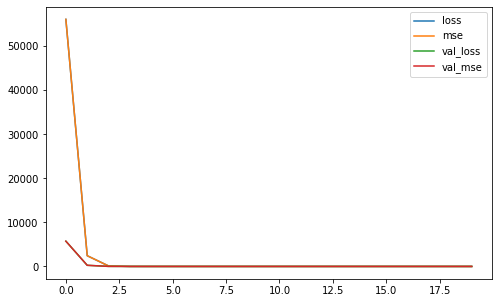

In [6]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.plot()

#### Logistic Regression model

In [7]:
class LogReg(BaseModel):
  def __init__(self, **kwargs):
    super().__init__(**kwargs)
  
  def build(self):
    input = Input(shape=self.ndims)
    flatten = Flatten()(input)
    output = Dense(1, activation='sigmoid')(flatten)
    self.model = Model(inputs=[input], outputs=[output])

  def train(self, x, y):
    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y, shuffle=True) # label balance
    self.model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=self.lr), loss='binary_crossentropy', metrics=['acc'])
    return self.model.fit(x_train, y_train, batch_size=self.batch_size, epochs=self.epochs, 
                          validation_data=(x_val, y_val))


In [8]:
(train_data, train_labels), (_, __) = tf.keras.datasets.mnist.load_data()

In [9]:
train_data = train_data / 255.0 # scaling

In [10]:
x = np.concatenate([train_data[train_labels == 9], train_data[train_labels == 6]], axis=0).reshape(-1, 28, 28, 1)
y = np.concatenate([train_labels[train_labels == 9], train_labels[train_labels == 6]], axis=0)
y[y == 9] = 1; y[y == 6] = 0 # whether a number is 9 or not

In [11]:
logreg = LogReg(ndims=(28, 28))
logreg.build()
history = logreg.train(x, y)

Epoch 1/20
297/297 [==============================] - 1s 3ms/step - loss: 0.2486 - acc: 0.9552 - val_loss: 0.0274 - val_acc: 0.9958
Epoch 2/20
297/297 [==============================] - 1s 3ms/step - loss: 0.0181 - acc: 0.9979 - val_loss: 0.0187 - val_acc: 0.9962
Epoch 3/20
297/297 [==============================] - 1s 3ms/step - loss: 0.0097 - acc: 0.9980 - val_loss: 0.0176 - val_acc: 0.9962
Epoch 4/20
297/297 [==============================] - 1s 2ms/step - loss: 0.0063 - acc: 0.9988 - val_loss: 0.0176 - val_acc: 0.9966
Epoch 5/20
297/297 [==============================] - 1s 2ms/step - loss: 0.0054 - acc: 0.9986 - val_loss: 0.0187 - val_acc: 0.9966
Epoch 6/20
297/297 [==============================] - 1s 3ms/step - loss: 0.0049 - acc: 0.9991 - val_loss: 0.0172 - val_acc: 0.9962
Epoch 7/20
297/297 [==============================] - 1s 3ms/step - loss: 0.0055 - acc: 0.9988 - val_loss: 0.0175 - val_acc: 0.9962
Epoch 8/20
297/297 [==============================] - 1s 3ms/step - loss: 0.

[]

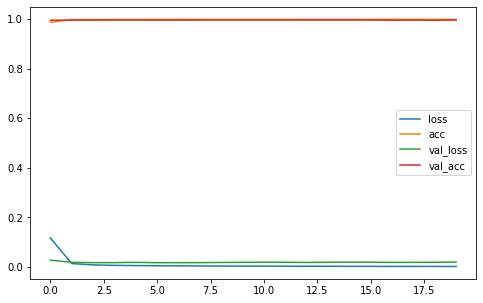

In [12]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.plot()

In [13]:
class SoftmaxReg(BaseModel):
  def __init__(self, n_classes, **kwargs):
    super().__init__(**kwargs)
    self.n_classes = n_classes

  def build(self):
    input = Input(shape=self.ndims)
    flatten = Flatten()(input)
    output = Dense(self.n_classes, activation='softmax')(flatten)
    self.model = Model(inputs=[input], outputs=[output])
  
  def train(self, x, y):
    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y, shuffle=True) 
  
    self.model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=self.lr), loss='sparse_categorical_crossentropy', 
                       metrics=['acc'])
    return self.model.fit(x_train, y_train, batch_size=self.batch_size, epochs=self.epochs, 
                          validation_data=(x_val, y_val))

In [14]:
softmax_reg = SoftmaxReg(ndims=(28, 28), n_classes=10)
softmax_reg.build()
history = softmax_reg.train(train_data, train_labels) 

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.7298 - acc: 0.8054 - val_loss: 0.3267 - val_acc: 0.9080
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3148 - acc: 0.9106 - val_loss: 0.3038 - val_acc: 0.9159
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2954 - acc: 0.9178 - val_loss: 0.2936 - val_acc: 0.9190
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2862 - acc: 0.9216 - val_loss: 0.2913 - val_acc: 0.9208
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2824 - acc: 0.9239 - val_loss: 0.2918 - val_acc: 0.9221
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2783 - acc: 0.9278 - val_loss: 0.2899 - val_acc: 0.9207
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2776 - acc: 0.9253 - val_loss: 0.2895 - val_acc: 0.9232
Epoch 8/20
1500/1500 [==============================] - 3s 2ms

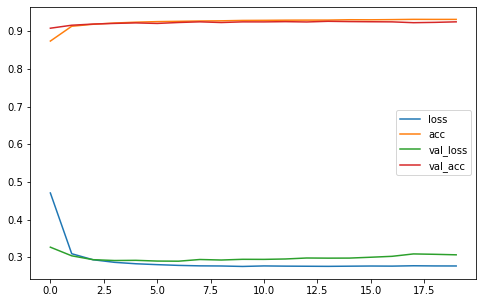

In [15]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.show()

In [16]:
class NeuralNetwork(BaseModel):
  def __init__(self, n_classes, **kwargs):
    super().__init__(**kwargs)
    self.n_classes = n_classes

  def build(self):
    input = Input(shape=self.ndims)
    flatten = Flatten()(input)
    hidden1 = Dense(64, activation='relu')(flatten)
    hidden2 = Dense(32, activation='relu')(hidden1)
    output = Dense(self.n_classes, activation='softmax')(hidden2)
    self.model = Model(inputs=[input], outputs=[output])
  
  def train(self, x, y):
    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y, shuffle=True) 
  
    self.model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=self.lr), loss='sparse_categorical_crossentropy', 
                       metrics=['acc'])
    return self.model.fit(x_train, y_train, batch_size=self.batch_size, epochs=self.epochs, 
                          validation_data=(x_val, y_val))

In [17]:
neural_net = NeuralNetwork(ndims=(28, 28), n_classes=10, epochs=10)
neural_net.build()
history = neural_net.train(train_data, train_labels) 

Epoch 1/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5379 - acc: 0.8491 - val_loss: 0.1811 - val_acc: 0.9497
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1586 - acc: 0.9517 - val_loss: 0.1419 - val_acc: 0.9584
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1125 - acc: 0.9684 - val_loss: 0.1184 - val_acc: 0.9671
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0908 - acc: 0.9734 - val_loss: 0.1184 - val_acc: 0.9676
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0737 - acc: 0.9779 - val_loss: 0.1072 - val_acc: 0.9707
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0661 - acc: 0.9803 - val_loss: 0.1114 - val_acc: 0.9707
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0561 - acc: 0.9826 - val_loss: 0.1209 - val_acc: 0.9695
Epoch 8/10
1500/1500 [==============================] - 4s 2ms

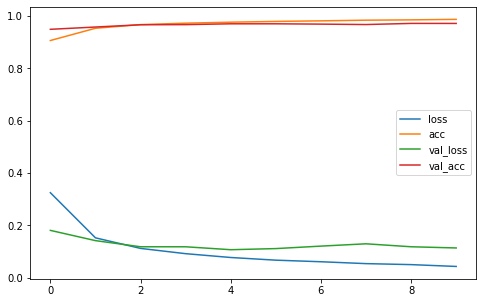

In [18]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.show()